<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 171.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 181.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 154.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 120.5 MB/s eta 0:00:00


Import pandas module


In [4]:
import pandas as pd


Import matplotlib


In [5]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [6]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [8]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [9]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display the first few duplicate rows
duplicates = df[df.duplicated()]
print("First few duplicate rows:")
print(duplicates.head())


Number of duplicate rows: 20
First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [11]:
# Step 1: Identify duplicate rows based on the subset of columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates_subset = df[df.duplicated(subset=subset_cols, keep=False)]

print(f"Number of duplicate rows based on {subset_cols}: {duplicates_subset.shape[0]}")

# Step 2: Analyze which columns have identical values within these duplicates

# Group by the subset columns and check variance within each group for other columns
grouped = duplicates_subset.groupby(subset_cols)

# Create a dictionary to hold average unique values count for each column
variation_summary = {}

for col in df.columns:
    if col not in subset_cols:
        # Count unique values in each group for the column
        unique_counts = grouped[col].nunique()
        # Average unique counts across groups - closer to 1 means mostly identical values
        avg_unique = unique_counts.mean()
        variation_summary[col] = avg_unique

# Convert to DataFrame for better viewing
variation_df = pd.DataFrame.from_dict(variation_summary, orient='index', columns=['AvgUniqueValues'])

# Sort columns where avg unique values are close to 1 (i.e., mostly identical in duplicates)
variation_df = variation_df.sort_values(by='AvgUniqueValues')

print("Columns with low variation (avg unique values close to 1) among duplicate groups:")
print(variation_df)


Number of duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork']: 65290
Columns with low variation (avg unique values close to 1) among duplicate groups:
                         AvgUniqueValues
ICorPM                          0.924765
Check                           1.000000
TBranch                         1.115987
ProfessionalCloud               1.275862
BuildvsBuy                      1.332288
...                                  ...
LearnCodeOnline                74.451411
ToolsTechHaveWorkedWith        86.169279
LanguageWantToWorkWith         90.467085
LanguageHaveWorkedWith         95.592476
ResponseId                    171.398119

[111 rows x 1 columns]


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


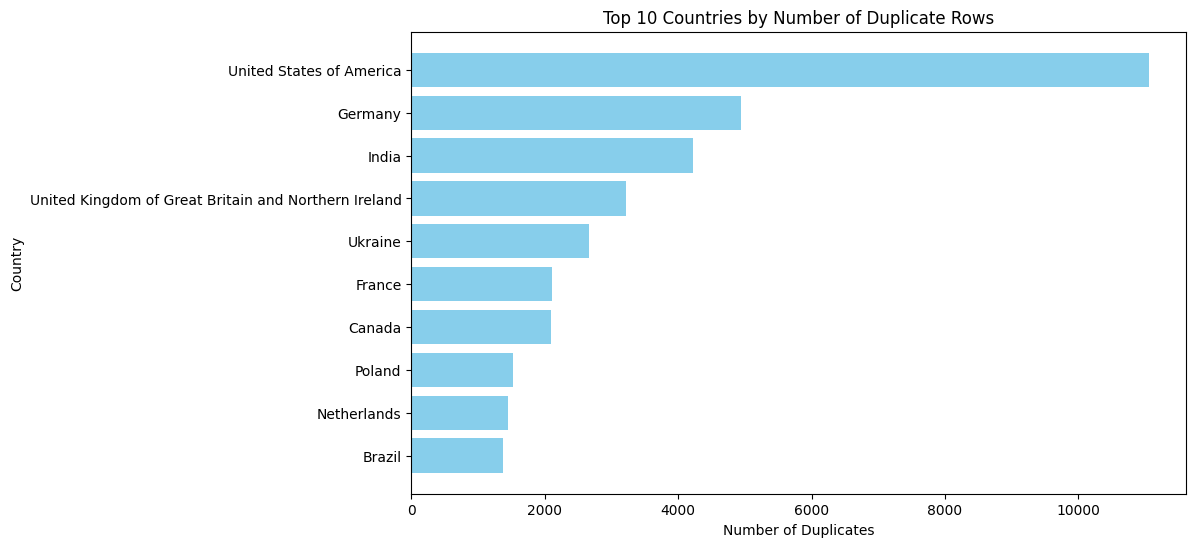

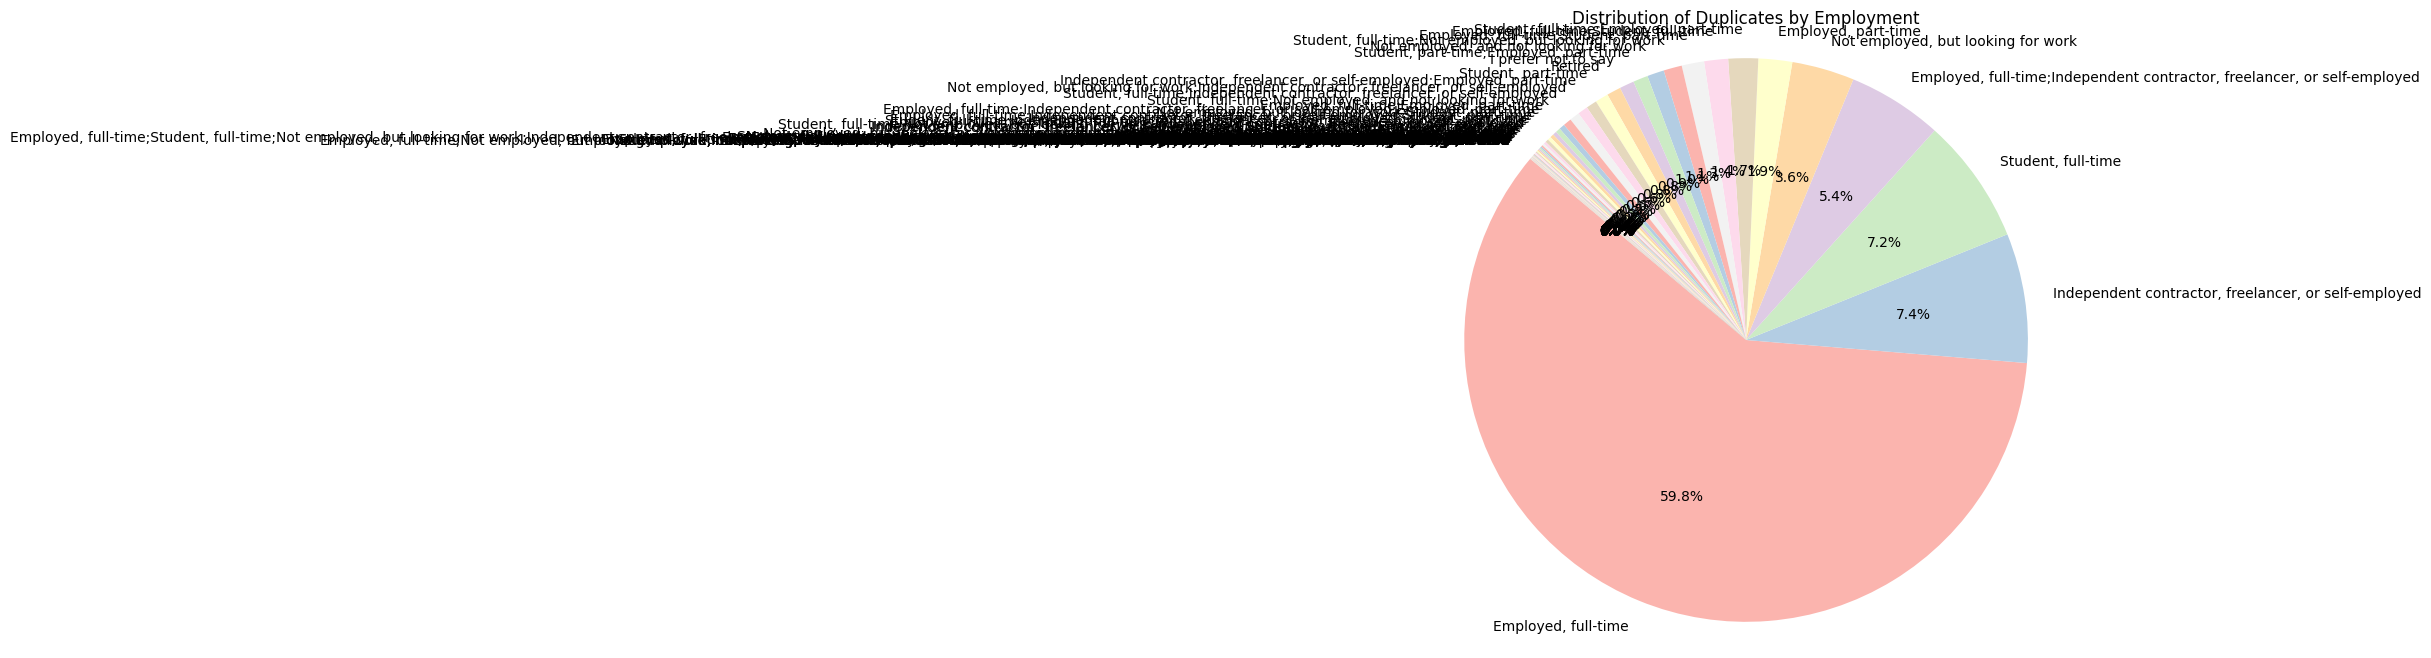

In [13]:
import matplotlib.pyplot as plt

# Assuming 'duplicates_subset' is the DataFrame with duplicates from Task 2

# Count duplicates by Country
country_counts = duplicates_subset['Country'].value_counts().head(10)  # Top 10 countries

# Count duplicates by Employment
employment_counts = duplicates_subset['Employment'].value_counts()

# Bar chart for duplicates by Country
plt.figure(figsize=(10, 6))
plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel('Number of Duplicates')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Duplicate Rows')
plt.gca().invert_yaxis()  # Invert y axis to have highest at top
plt.show()

# Pie chart for duplicates by Employment
plt.figure(figsize=(8, 8))
plt.pie(employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Duplicates by Employment')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [16]:
# Define the columns that should uniquely identify a record
critical_cols = ['ResponseId', 'MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age']

# Check if these columns exist (to avoid errors)
missing_cols = [col for col in critical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: These critical columns are missing in dataset: {missing_cols}")

# Remove duplicates based on the subset of critical columns
df_unique = df.drop_duplicates(subset=critical_cols)

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing duplicates based on critical columns: {df_unique.shape}")


Original dataset shape: (65457, 114)
Dataset shape after removing duplicates based on critical columns: (65437, 114)


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
